# Documentation


## CSV file entry rules:

#### The coefficients obtained using this code for a nth order polynomial would be the coefficients of terms from x^n to x to constant, hence, the output/ dependent variable fed into the data should be of the form, 'x,f(x)' .


#### The first 'n+1' observations will be taken into consideration, hence the 'data.csv' must have at least n+1 entries.

# Defining back substitution

In [205]:
def back_substitution(matrix, vector,n):
    x = [0] * n  
    for i in range(n - 1, -1, -1):  
        x[i] = vector[i] / matrix[i][i]  
        for j in range(i):
            vector[j] -= matrix[j][i] * x[i]
    return x

# Finding the transpose

In [206]:
def transpose(matrix):
    rows = len(matrix)
    cols = len(matrix[0])
    trans_matrix = [[0 for _ in range(rows)] for _ in range(cols)]
    for i in range(rows):
        for j in range(cols):
            trans_matrix[j][i] = matrix[i][j]
    return(trans_matrix)

# Matrix multiplication

In [207]:
def mat_multiply(m1 , m2): # m1 * m2 ; c1 = r2
    r1 = len(m1)
    r2 = len(m2)
    #c1 = len(m1[0])
    if type(m2[0]) == float:
        c2 = 1
        product = [0 for _ in range(r1)]
        for i in range(r1):
            for j in range(r2):
                product[i] = product[i] + m1[i][j]*m2[j]
    else:
        c2 = len(m2[0])
        product = [[0 for _ in range(c2)] for _ in range(r1)]
        for i in range(r1):
            for j in range(c2): # r2 here means c1
                for k in range(r2):
                    product[i][j] = product[i][j] + m1[i][k]*m2[k][j]
    return(product)

# Importing Matrix

In [208]:
import csv
A=[]
B=[]
row_A = int(input("Enter the order of the polynomial: "))
row_A = row_A + 1
with open('data.csv','r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        data = []
        for i in range(row_A):
            p = float(row[0])
            if i == 0 :
                data.append(1)
            else:
                data.append(p**i)
        A.append(data)
        B.append(float(row[1]))
print(A)
print(B)
A_t = transpose(A)
A_f = mat_multiply(A_t,A)
B_f = mat_multiply(A_t,B)
print(A_f)
print(B_f)

Enter the order of the polynomial: 3
[[1, 96.0, 9216.0, 884736.0], [1, 95.0, 9025.0, 857375.0], [1, 94.0, 8836.0, 830584.0], [1, 92.0, 8464.0, 778688.0], [1, 86.0, 7396.0, 636056.0], [1, 80.0, 6400.0, 512000.0], [1, 79.0, 6241.0, 493039.0], [1, 78.0, 6084.0, 474552.0], [1, 75.0, 5625.0, 421875.0], [1, 72.0, 5184.0, 373248.0], [1, 70.0, 4900.0, 343000.0], [1, 68.0, 4624.0, 314432.0], [1, 67.0, 4489.0, 300763.0], [1, 65.0, 4225.0, 274625.0], [1, 56.0, 3136.0, 175616.0], [1, 55.0, 3025.0, 166375.0], [1, 51.0, 2601.0, 132651.0], [1, 47.0, 2209.0, 103823.0], [1, 44.0, 1936.0, 85184.0], [1, 42.0, 1764.0, 74088.0], [1, 38.0, 1444.0, 54872.0], [1, 37.0, 1369.0, 50653.0], [1, 36.0, 1296.0, 46656.0], [1, 35.0, 1225.0, 42875.0], [1, 33.0, 1089.0, 35937.0], [1, 32.0, 1024.0, 32768.0], [1, 29.0, 841.0, 24389.0], [1, 28.0, 784.0, 21952.0], [1, 27.0, 729.0, 19683.0], [1, 24.0, 576.0, 13824.0], [1, 23.0, 529.0, 12167.0], [1, 21.0, 441.0, 9261.0], [1, 11.0, 121.0, 1331.0], [1, 8.0, 64.0, 512.0], [1, 7.

# Applying Gaussian Elimination

In [209]:
for i in range(1,row_A):
    for j in range(i):
        list1 = [x * A_f[j][j] for x in A_f[i]]
        list2 = [x * A_f[i][j] for x in A_f[j]]
        B_f[i] = A_f[j][j]*B_f[i] - A_f[i][j]*B_f[j]
        A_f[i] = [x - y for x, y in zip(list1, list2)]
print("A = ",A_f,"B = ",B_f)

A =  [[75, 289.0, 203009.0, 2989585.0], [0.0, 15142154.0, 165549274.0, 80168315810.0], [0.0, 0.0, 5.755487375691971e+17, 6.421494395036275e+18], [0.0, 0.0, 0.0, 8.980052163713381e+38]] B =  [9375069.0, 240851267109.0, 2.04153540159827e+19, 2.6940205328710425e+39]


# Solving Equations using the matrices

In [210]:
C = []
blow = 0
for i in range(row_A):
    if A_f[i][i] == 0:
        if B_f[i] == 0:
            #print("Infinite solutions")
            blow = 1
        else : 
            #print("No solution")
            blow = 2
            break
if blow == 2:
    print("No solution")
elif blow == 1:
    print("Infinite solutions")
else:
    solution = back_substitution(A_f, B_f, row_A)
    solution.reverse()
    print("Solution:", solution)
    solution.reverse()


Solution: [3.0000054384506227, 1.9995455341526476, 0.9813911590157179, 1.178398691263836]


# Generating an illustrative graph

In [211]:
x=[]
y=[]
with open('data.csv','r') as file:
    csv_reader = csv.reader(file)
    header = next(csv_reader)
    for row in csv_reader:
        p = float(row[0])
        q = float(row[1])
        x.append(p)
        y.append(q)

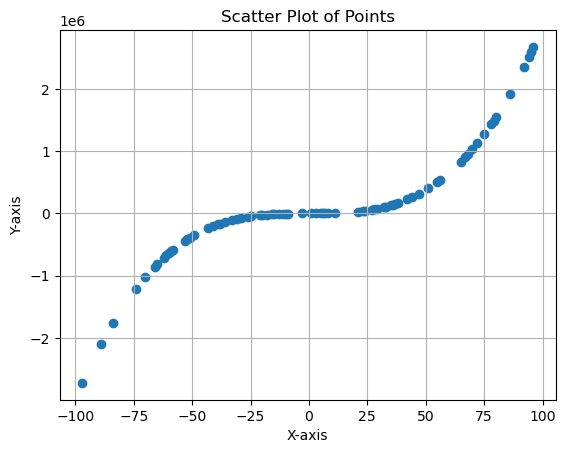

In [212]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
n = len(x)
# Customize the plot
plt.title('Scatter Plot of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

# Display the plot
plt.show()

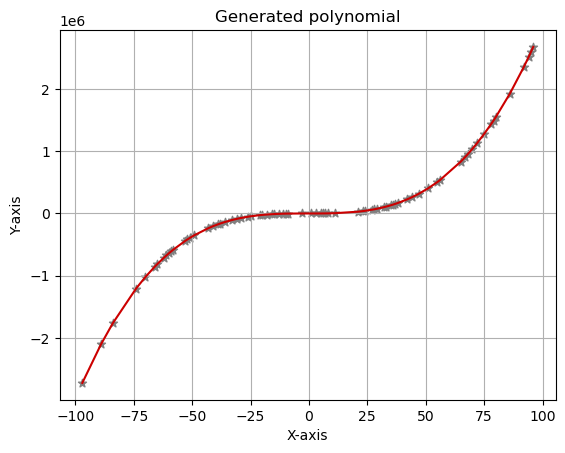

In [213]:
y1 = [0 for _ in range(n)]
#print(x)
for i in range(n):
    for j in range(row_A):
        y1[i] = y1[i] + solution[j]*((x[i])**(j))
    #print(y1[i])
#print(y1,solution)
plt.plot(x, y1, color=(0.8, 0, 0))
plt.scatter(x, y, color=(0.5, 0.5, 0.5), marker = '*')

# Customize the plot
plt.title('Generated polynomial')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)

# Display the plot
plt.show()